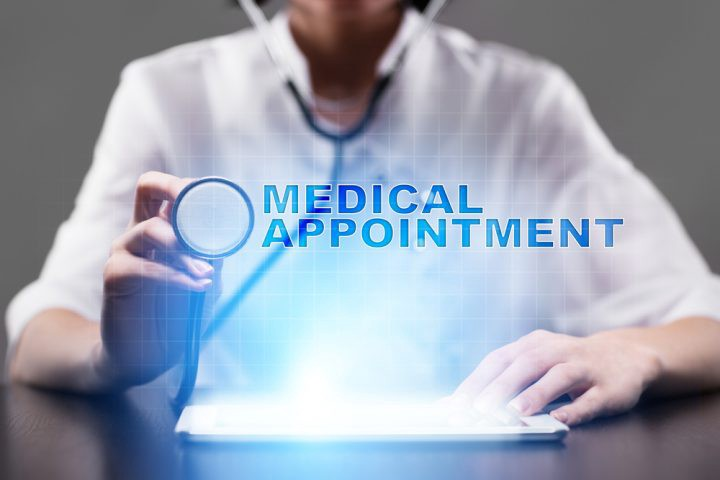

In [3]:
from IPython.display import Image
Image("1_2heJl1x3BPS9zLJiZfudCg.jpeg")

This analysis is part of the Udacity Data Analysis professional program Egypt FWD The goal of this project to investigate a dataset of appointment records for Brasil public hospitals. It aims to explore a dataset containing approximately 100k medical appointments from the Brazilian public health system. I divided this project to main 4 parts as the following : (1) Introduction, where I investigation problems in the dataset, try to understand it and described it. (2) Data Wrangling, cleaning data by removing wrong data.  (3) Exploratory Data Analysis,The analysis should be focused on finding trends influencing patients to show or not show up to appointments; (4) Conclusion communicate our findings the team member and stockholders.

### Note:

mainly descriptive statistics is the main method for analyzing this data.

# Project: Investigate a Dataset (No show appointments)

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction :              

No-shows occur, when a patient fails to attend a scheduled appointment with no prior notification to the healthcare provider. They are missed healthcare utilized time slots and resources that can negatively affect the utilization of space and human resources. Further, they can affect the patient’s health condition due to the delay in diagnosis or treatment. Prospective patients can also be impacted and less satisfied due to their inability of scheduling timely appointments. 

the total dataset is consist of 110.527 medical appointments with 14 columns (characteristics). The most important one if the patient show-up or no-show to the appointment.

Columns:

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female.
* AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* Age: How old is the patient.
* Neighborhood: Where the appointment takes place.
* Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* Hypertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handicap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False.

In [2]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
import seaborn as sns

In [3]:
# import data from csv file
# read the data from csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Read the first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# check the data shape
df.shape
print(f"the No-Show dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

the No-Show dataframe has 110527 rows and 14 columns


In [6]:
# understand the data using descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# identify the unique values in each column
unique_values = df.nunique()
unique_values

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [23]:
# Print the unique values in each column
print(f"Unique Values in `Gender` column is  => {df['Gender'].unique()}")
print(f"Unique Values in `Age` column is  => {np.sort(df['Age'].unique())}")
print(f"Unique Values in `Scholarship`column is  => {df['Scholarship'].unique()}")
print(f"Unique Values in `Hypertension` column is  => {df['Hipertension'].unique()}")
print(f"Unique Values in `Diabetes` => column is {df['Diabetes'].unique()}")
print(f"Unique Values in `Alcoholism` => column is {df['Alcoholism'].unique()}")
print(f"Unique Values in `Handicap` => column is {df['Handcap'].unique()}")
print(f"Unique Values in `SMSReceived` => column is {df['SMS_received'].unique()}")
print(f"Unique Values in `No-show` => column is {df['No-show'].unique()}")

Unique Values in `Gender` column is  => ['F' 'M']
Unique Values in `Age` column is  => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
Unique Values in `Scholarship`column is  => [0 1]
Unique Values in `Hypertension` column is  => [1 0]
Unique Values in `Diabetes` => column is [0 1]
Unique Values in `Alcoholism` => column is [0 1]
Unique Values in `Handicap` => column is [0 1 2 3 4]
Unique Values in `SMSReceived` => column is [0 1]
Unique Values in `No-show` => column is ['No' 'Yes']


In [24]:
# full view of the data
# check the null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Comments on the Dataset:
* The dataset is not clean, there are some wrong data in the dataset as the following.
  * patient id is float type
  * appointment id is int type
  * few column names misspelled, like AppointmentDay, ScheduledDay, No-show, SMS_received, Hypertension, Diabetes, Alcoholism, Handicap. 
  * the column ScheduledDay is not a date, it is a string.
  * the column AppointmentDay is not a date, it is a string. 
  * the column "No-show" is not a boolean, it is a string.
  * the age column have negative values.
* The patient id is not unique, there are some duplicated patient id.
* the handicap column isn't standardized .

# Data wrangling:

In [25]:
# copy the dataset to a new dataset
df_copy = df.copy()

In [27]:
# change the data type of the columns patient id & appointment id
df_copy[["PatientId","AppointmentID"]] = df_copy[["PatientId","AppointmentID"]].astype(str)

In [28]:
# letting use the appointment id as the index
df_copy.set_index("AppointmentID", inplace=True)

In [ ]:
#